# Regression problem- 
## Using features available trying to predict concrete compressive strength

## Important Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel(r"C:\Users\91798\Downloads\Concrete_Data.xls")
df

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [3]:
new_col_name=['Cement','Slag','Fly Ash','Water','Superplasticizer','Coarse Aggregate','Fine Aggregate','Age','strength']

In [4]:
df.columns=new_col_name

In [5]:
df

,Cement,Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [6]:
df.shape

(1030, 9)

# Uni-variant Analysis

In [7]:
columns=df.columns

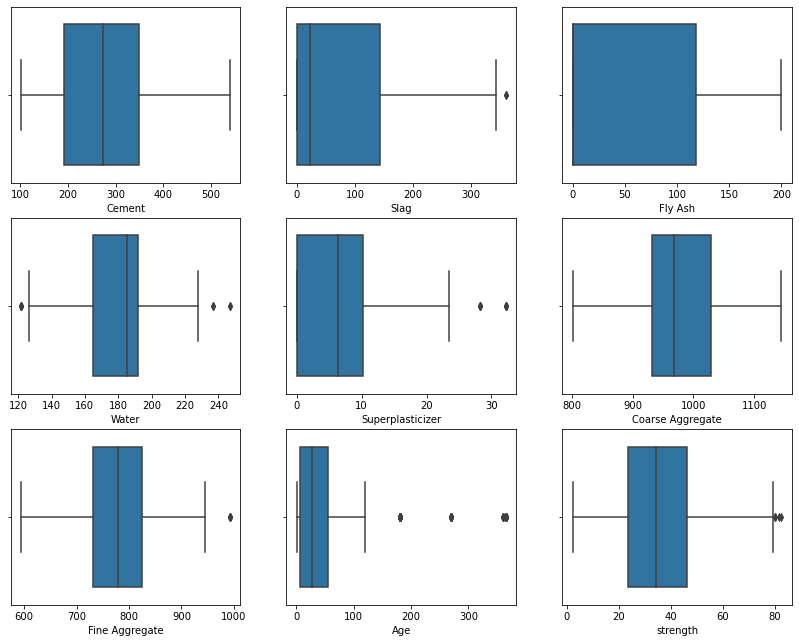

In [8]:
plt.figure(figsize=(14,11))

for i,j in enumerate(columns):
    plt.subplot(3,3,i+1)
    sns.boxplot(x=df[j])

### Columns having outliers
+ Slag
+ Water
+ Superplasticizer
+ Fine Aggregate
+ Age

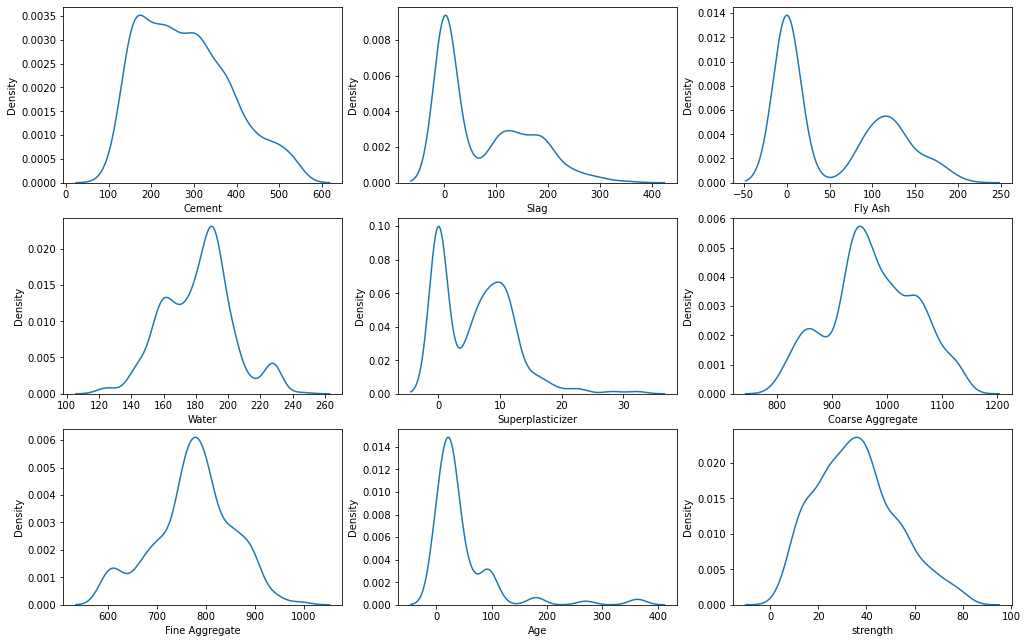

In [9]:
plt.figure(figsize=(17,11))

for i,j in enumerate(columns):
    plt.subplot(3,3,i+1)
    sns.kdeplot(x=df[j])

+ Slag, Superplasticizer and Age is Right Skewed 
+ Fly Ash is Binomially Distributted
+ Other than that are Normally Distributed

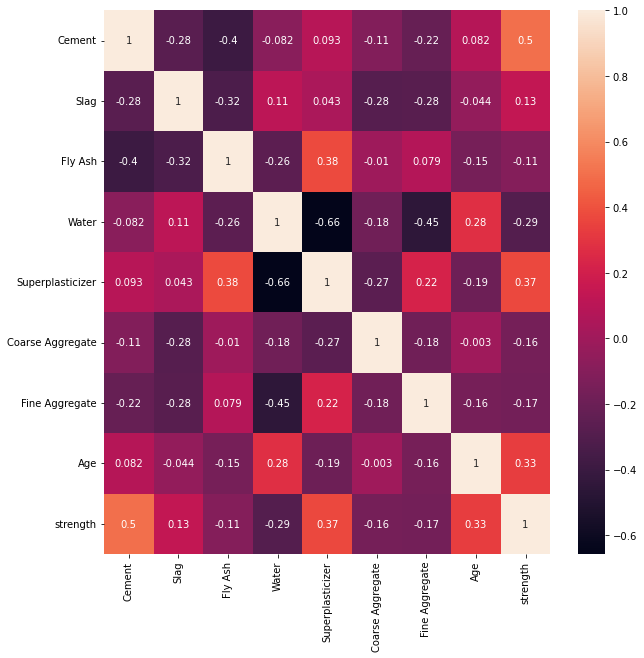

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In this Heatmap, we can see that there is huge Multi-Colinearity between the columns
+ Fly Ash - Cement
+ Superplasticizer - Fly Ash
+ Superplasticizer - Water
+ Fine Aggregate - Water

### It's Needed to treated properly !!!

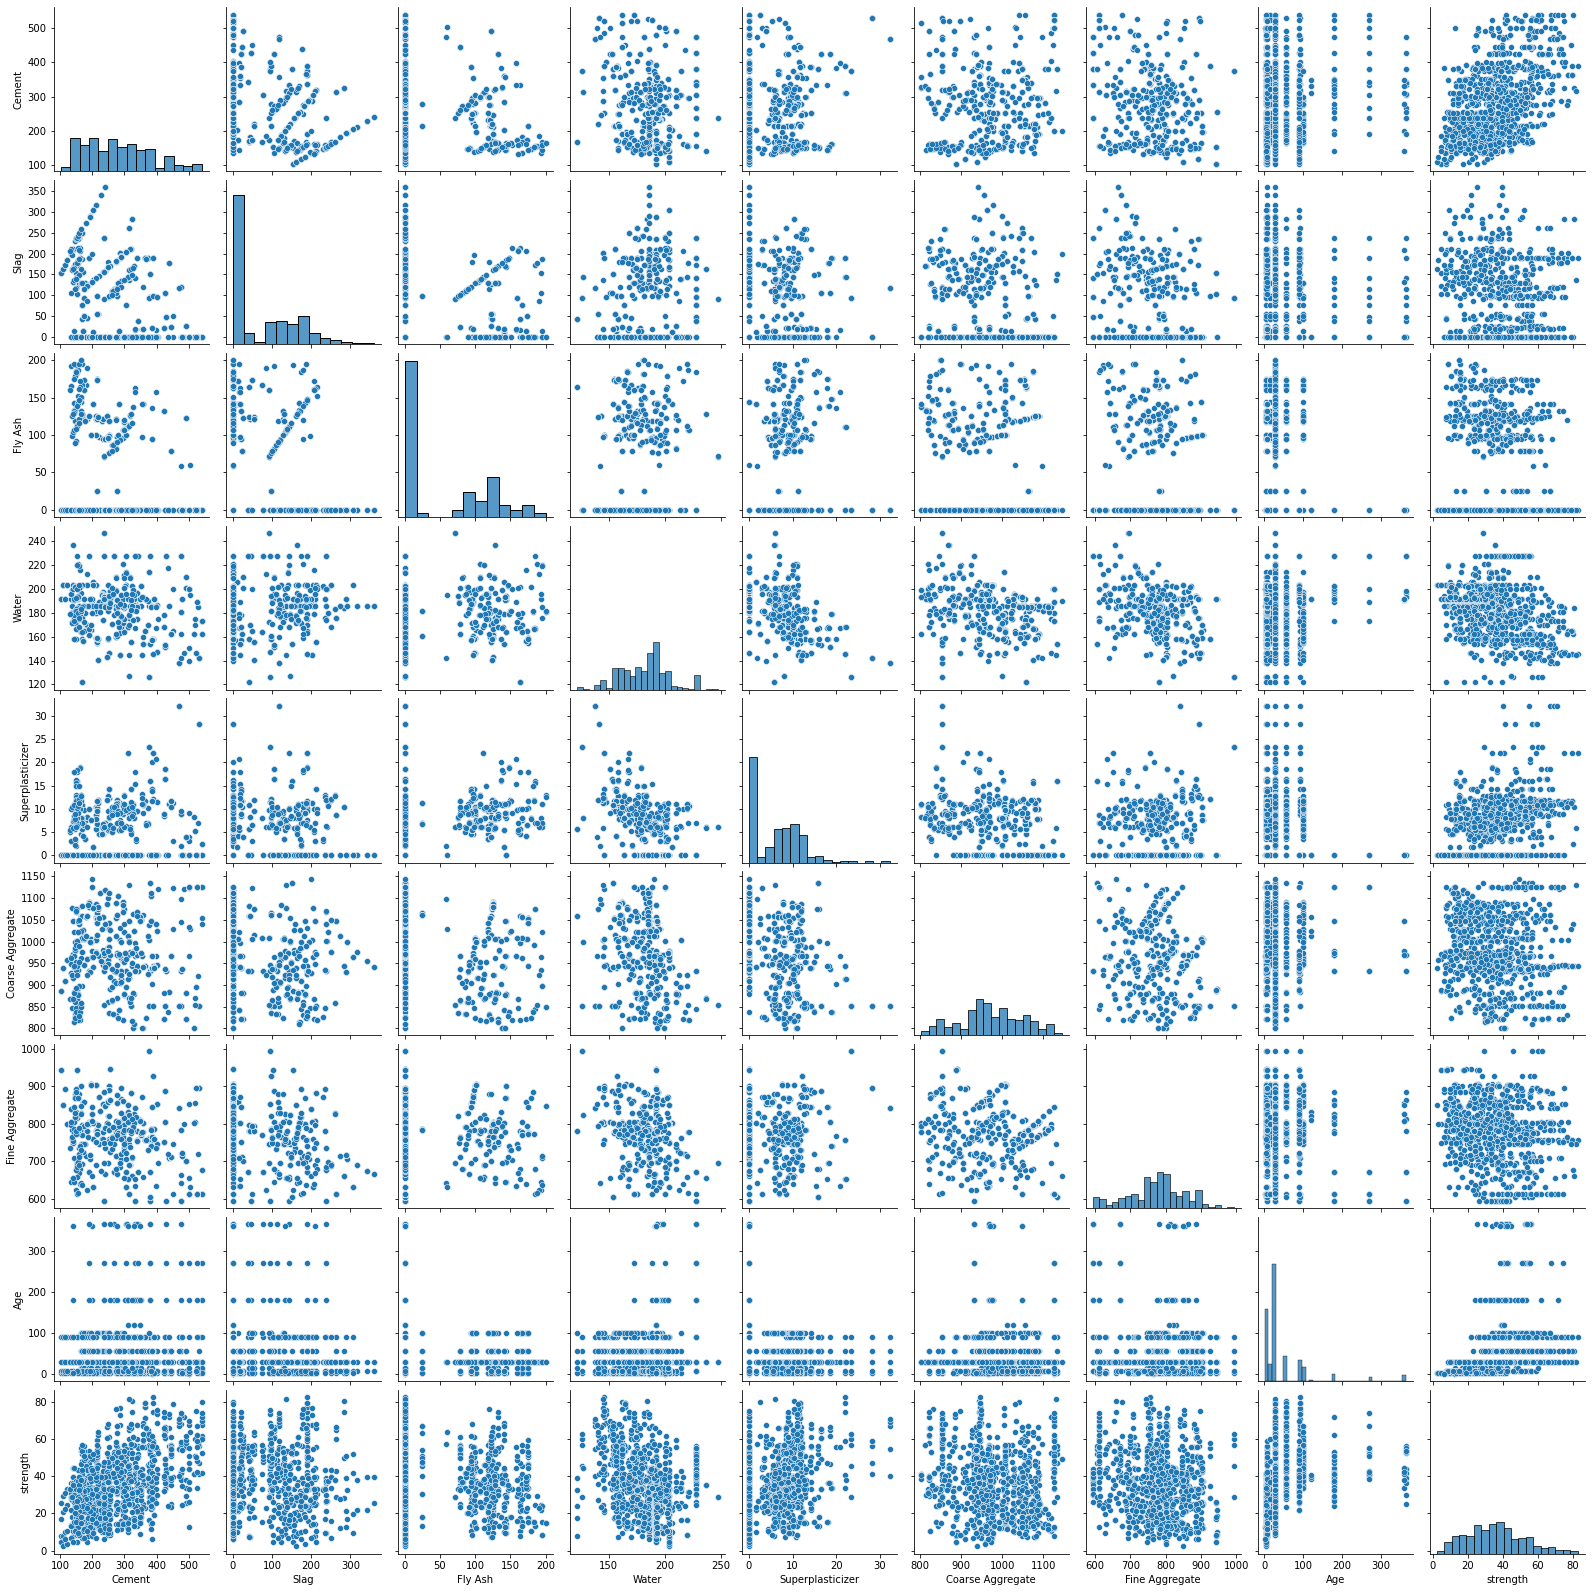

In [11]:
sns.pairplot(df)
plt.show()

# Treating Outliers

In [12]:
def Out_rem(column):
    Q3=df[column].quantile(q=0.75)
    Q1=df[column].quantile(q=0.25)
    IQR=Q3-Q1
    max_lmt=Q3+1.5*(IQR)
    min_lmt=Q1-1.5*(IQR)
    out_idx=df[(df[column]>max_lmt) | (df[column]<min_lmt)].index
    print(df[column].name)
    print(Q3,"-",Q1,"=",IQR)
    print(max_lmt)
    print(min_lmt)
    print(out_idx)
    df.drop(labels=(out_idx),axis=0,inplace=True)
    sns.kdeplot(df[column])
    plt.show()
    sns.boxplot(df[column])
    plt.show()

strength
46.13628654 - 23.707115153 = 22.429171387
79.78004362050001
-9.936641927500002
Int64Index([0, 153, 181, 381], dtype='int64')


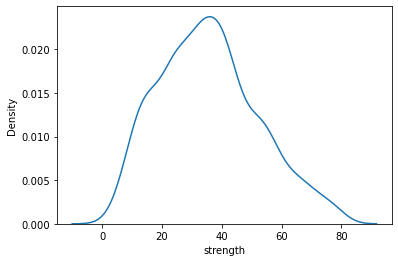

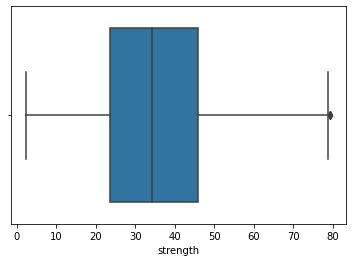

In [13]:
Out_rem("strength")

Age
56.0 - 7.0 = 49.0
129.5
-66.5
Int64Index([  2,   3,   4,   6,  12,  17,  19,  20,  23,  24,  25,  26,  27,
             30,  31,  32,  33,  34,  35,  39,  41,  42,  43,  47,  50,  51,
             56,  58,  60,  61,  63,  64,  65,  66, 603, 604, 609, 610, 615,
            616, 619, 620, 621, 622, 755, 756, 762, 768, 769, 791, 792, 794,
            795, 797, 798, 813, 814, 820, 823],
           dtype='int64')


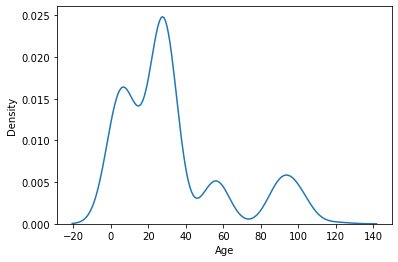

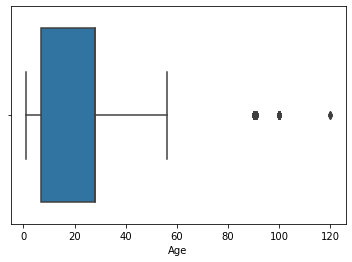

In [14]:
Out_rem("Age")

Fine Aggregate
825.0 - 741.2 = 83.79999999999995
950.6999999999999
615.5000000000001
Int64Index([  7,   9,  18,  28,  29,  36,  37,  38,  44,  45,  48,  49,  52,
             59,  67,  71,  74,  85,  94,  97, 108, 117, 120, 131, 140, 143,
            154, 163, 166, 176, 389, 390, 746, 747, 748, 749, 750, 751, 752,
            753, 754, 796, 799, 815, 816, 817, 818, 819, 932, 935],
           dtype='int64')


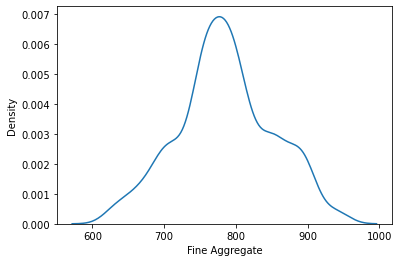

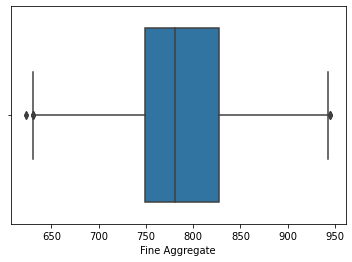

In [15]:
Out_rem("Fine Aggregate")

Superplasticizer
10.4 - 0.0 = 10.4
26.0
-15.600000000000001
Int64Index([76, 79, 99, 102, 122, 125, 145, 148, 168, 171], dtype='int64')


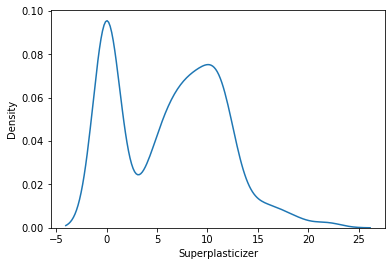

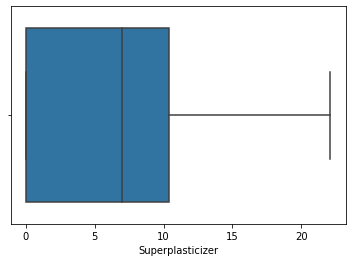

In [16]:
Out_rem("Superplasticizer")

Water
192.0 - 164.9 = 27.099999999999994
232.64999999999998
124.25000000000001
Int64Index([224, 225, 226, 227, 228, 862, 873, 936, 1019], dtype='int64')


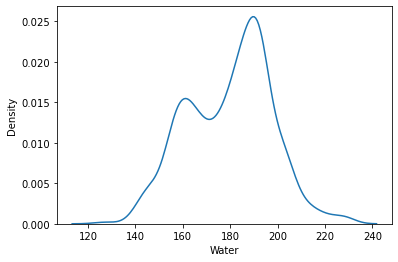

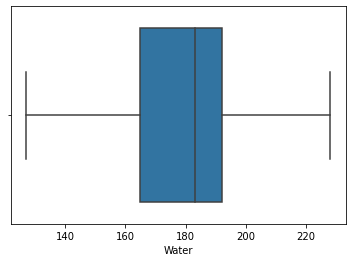

In [17]:
Out_rem("Water")

# Modelling

In [18]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, train_size=0.75, \
                                                    random_state=0)

print(df_train.shape)
print(df_test.shape)

(673, 9)
(225, 9)


In [19]:
y_train = df_train.pop('strength')
X_train = df_train

## Backward Feature Selection ( Treating Multi-Collinearity )

In [20]:
import statsmodels.api as sm

# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [21]:
lr.params

const               21.499796
Cement               0.107915
Slag                 0.082007
Fly Ash              0.048722
Water               -0.204826
Superplasticizer     0.400722
Coarse Aggregate     0.002564
Fine Aggregate      -0.004513
Age                  0.319969
dtype: float64

In [22]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               strength   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     293.8
Date:                Fri, 05 Aug 2022   Prob (F-statistic):          2.10e-212
Time:                        14:57:08   Log-Likelihood:                -2345.4
No. Observations:                 673   AIC:                             4709.
Df Residuals:                     664   BIC:                             4750.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               21.4998     27.749      0.775      0.439     -32.986      75.985
Cement               0.1079      0.009     12.677      0.000       0.091       0.125
Slag                 0.0820      0.010      8.113      0.000       0.062       0.102
Fly Ash              0.0487      0.012      3.974      0.000       0.025       0.073
Water               -0.2048      0.043     -4.722      0.000      -0.290      -0.120
Superplasticizer     0.4007      0.101      3.987      0.000       0.203       0.598
Coarse Aggregate     0.0026      0.010      0.261      0.794      -0.017       0.022
Fine Aggregate      -0.0045      0.011     -0.409      0.683      -0.026       0.017
Age                  0.3200      0.011     29.526      0.000       0.299       0.341
==============================================================================
Omnibus:                        6.793   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                7.224
Skew:                           0.176   Prob(JB):                       0.0270
Kurtosis:                       3.366   Cond. No.                     1.17e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
X_train_sm

,const,Cement,Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
110,1.0,286.30,200.9,0.00,144.70,11.20,1004.6,803.70,7
781,1.0,296.00,0.0,0.00,192.00,0.00,1085.0,765.00,7
990,1.0,151.80,178.1,138.70,167.50,18.30,944.0,694.60,28
337,1.0,275.07,0.0,121.35,159.48,9.90,1053.6,777.50,56
758,1.0,350.00,0.0,0.00,203.00,0.00,974.0,775.00,14
...,...,...,...,...,...,...,...,...,...
966,1.0,154.80,0.0,142.80,193.30,9.10,1047.4,696.70,28
274,1.0,251.37,0.0,118.27,188.45,5.75,1028.4,757.73,3
724,1.0,310.00,0.0,0.00,192.00,0.00,1012.0,830.00,90
654,1.0,122.60,183.9,0.00,203.50,0.00,958.2,800.10,28


### Droping a columns having high probability and less significance in prediction

In [24]:
X_train.drop(columns=["Coarse Aggregate","Fine Aggregate"],axis = 0, inplace=True)

In [25]:
X_train

,Cement,Slag,Fly Ash,Water,Superplasticizer,Age
110,286.30,200.9,0.00,144.70,11.20,7
781,296.00,0.0,0.00,192.00,0.00,7
990,151.80,178.1,138.70,167.50,18.30,28
337,275.07,0.0,121.35,159.48,9.90,56
758,350.00,0.0,0.00,203.00,0.00,14
...,...,...,...,...,...,...
966,154.80,0.0,142.80,193.30,9.10,28
274,251.37,0.0,118.27,188.45,5.75,3
724,310.00,0.0,0.00,192.00,0.00,90
654,122.60,183.9,0.00,203.50,0.00,28


In [26]:
import statsmodels.api as sm

# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [27]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               strength   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     392.0
Date:                Fri, 05 Aug 2022   Prob (F-statistic):          1.02e-214
Time:                        14:57:09   Log-Likelihood:                -2346.1
No. Observations:                 673   AIC:                             4706.
Df Residuals:                     666   BIC:                             4738.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               20.0639      4.649      4.316      0.000      10.936      29.192
Cement               0.1087      0.004     25.609      0.000       0.100       0.117
Slag                 0.0834      0.005     17.838      0.000       0.074       0.093
Fly Ash              0.0509      0.008      6.757      0.000       0.036       0.066
Water               -0.2044      0.023     -8.767      0.000      -0.250      -0.159
Superplasticizer     0.3771      0.093      4.071      0.000       0.195       0.559
Age                  0.3198      0.011     29.578      0.000       0.299       0.341
==============================================================================
Omnibus:                        7.980   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                8.689
Skew:                           0.191   Prob(JB):                       0.0130
Kurtosis:                       3.404   Cond. No.                     5.22e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Variance_inflation_factor to overcome Multi-collinearity

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [29]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif

,Features,VIF
0,Cement,14.25
1,Slag,3.04
2,Fly Ash,4.64
3,Water,21.10
4,Superplasticizer,4.75
5,Age,2.29


In [30]:
X = X_train.copy()

In [31]:
X = X.drop('Water', 1)

X_train_sm = sm.add_constant(X)

lr = sm.OLS(y_train, X_train_sm).fit()

vif = pd.DataFrame()

vif['Features'] = X.columns

vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)

vif = vif.sort_values(by = "VIF", ascending = False)

print(np.round(lr.pvalues, 3))

print('#' * 20)

print(vif)

const               0.0
Cement              0.0
Slag                0.0
Fly Ash             0.0
Superplasticizer    0.0
Age                 0.0
dtype: float64
####################
           Features   VIF
3  Superplasticizer  3.62
0            Cement  3.17
2           Fly Ash  2.40
4               Age  2.16
1              Slag  1.62


In [32]:
# Add a constant to get an intercept
X_train_vif = sm.add_constant(X_train_sm)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_vif).fit()

In [33]:
lr.params

const              -18.355749
Cement               0.107677
Slag                 0.075569
Fly Ash              0.041649
Superplasticizer     0.865596
Age                  0.319189
dtype: float64

In [34]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               strength   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     408.5
Date:                Fri, 05 Aug 2022   Prob (F-statistic):          2.81e-200
Time:                        14:57:10   Log-Likelihood:                -2382.9
No. Observations:                 673   AIC:                             4778.
Df Residuals:                     667   BIC:                             4805.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -18.3557      1.638    -11.208      0.000     -21.572     -15.140
Cement               0.1077      0.004     24.039      0.000       0.099       0.116
Slag                 0.0756      0.005     15.600      0.000       0.066       0.085
Fly Ash              0.0416      0.008      5.288      0.000       0.026       0.057
Superplasticizer     0.8656      0.078     11.082      0.000       0.712       1.019
Age                  0.3192      0.011     27.975      0.000       0.297       0.342
==============================================================================
Omnibus:                       11.914   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.204
Skew:                           0.294   Prob(JB):                      0.00224
Kurtosis:                       3.298   Cond. No.                     1.50e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Residual Analysis on Training Data

In [35]:
y_train_pred = lr.predict(X_train_vif)

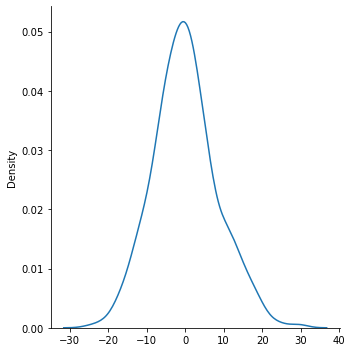

In [36]:
residual = y_train - y_train_pred

sns.displot(residual, kind='kde')

# Modelling

In [37]:
x_train = X_train_vif[['Cement','Slag','Fly Ash','Superplasticizer','Age']]

In [38]:
y_test = df.pop('strength')
x_test = df[['Cement','Slag','Fly Ash','Superplasticizer','Age']]

In [39]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(x_train), 
                                    columns = x_train.columns, 
                                    index = x_train.index)

X_train_num_rescaled.head()

,Cement,Slag,Fly Ash,Superplasticizer,Age
110,0.237619,1.247586,-0.206239,0.407767,-1.000000
781,0.303605,-0.137931,-0.206239,-0.679612,-1.000000
990,-0.677347,1.090345,0.963238,1.097087,0.000000
337,0.161224,-0.137931,0.816948,0.281553,1.333333
758,0.670952,-0.137931,-0.206239,-0.679612,-0.666667


In [40]:
X_test_num_rescaled = pd.DataFrame(scaler.transform(x_test), 
                                   columns = x_test.columns, 
                                   index = x_test.index)

X_test_num_rescaled.head()

,Cement,Slag,Fly Ash,Superplasticizer,Age
1,1.963469,-0.137931,-0.206239,-0.436893,0.000000
5,0.099524,0.648276,-0.206239,-0.679612,2.952381
8,0.099524,0.648276,-0.206239,-0.679612,0.000000
10,-0.358980,0.775172,-0.206239,-0.679612,2.952381
11,-0.358980,0.775172,-0.206239,-0.679612,0.000000


# Linear Regression

In [41]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_num_rescaled, y_train)

LinearRegression()

In [42]:
y_train_pred = regressor.predict(X_train_num_rescaled)

In [43]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_train, y_train_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_train, y_train_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))

Mean Absolute Error:  6.4860095672666205
Mean Squared Error:  69.64591991123741
Root Mean Squared Error:  8.345413106086326


In [44]:
print(metrics.r2_score(y_train, y_train_pred))

0.7538438766951514


In [45]:
y_test_pred = regressor.predict(X_test_num_rescaled)

In [46]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  6.458935414849272
Mean Squared Error:  70.13911177845273
Root Mean Squared Error:  8.374909657927823


In [47]:
print(metrics.r2_score(y_test, y_test_pred))

0.7469718826112348


# KNN REGRESSOR

In [48]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
regressor.fit(X_train_num_rescaled, y_train)

KNeighborsRegressor()

In [49]:
y_train_pred = regressor.predict(X_train_num_rescaled)

In [50]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_train, y_train_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_train, y_train_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))

Mean Absolute Error:  3.938491720505672
Mean Squared Error:  29.35473029645405
Root Mean Squared Error:  5.41800058106808


In [51]:
print(metrics.r2_score(y_train, y_train_pred))

0.8962488165904946


In [52]:
y_test_pred = regressor.predict(X_test_num_rescaled)

In [53]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  4.12797013952048
Mean Squared Error:  32.853753232638596
Root Mean Squared Error:  5.731819364969433


In [54]:
print(metrics.r2_score(y_test, y_test_pred))

0.8814794895625782


## Hyper-Parameter Tuning for KNN

In [55]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
tuned_parameters = [{'n_neighbors': [i for i in range(1, 51)], 
                     'p': [1, 2, 3]}]

clf = RandomizedSearchCV(
    estimator=KNeighborsRegressor(), 
    param_distributions=tuned_parameters, 
    scoring='r2',
    cv=5,
    return_train_score=True,
    verbose=1
)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(),
                   param_distributions=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19, 20,
                                                         21, 22, 23, 24, 25, 26,
                                                         27, 28, 29, 30, ...],
                                         'p': [1, 2, 3]}],
                   return_train_score=True, scoring='r2', verbose=1)

In [58]:
print(len(X_test_num_rescaled))
print(len(y_test))

898
898


In [60]:
print("Best parameters set found on train set")
print(clf.best_params_)
print(clf.best_estimator_)
best_estimator_knn= clf.best_estimator_
print()


Best parameters set found on train set
{'p': 2, 'n_neighbors': 4}
KNeighborsRegressor(n_neighbors=4)



## Checking the score after Hyperparameter Tuning

In [61]:
from sklearn.neighbors import KNeighborsRegressor
regressor = best_estimator_knn
regressor.fit(X_train_num_rescaled, y_train)

KNeighborsRegressor(n_neighbors=4)

In [62]:
y_train_pred = regressor.predict(X_train_num_rescaled)

In [63]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_train, y_train_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_train, y_train_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))

Mean Absolute Error:  3.667530923538611
Mean Squared Error:  25.74443755615786
Root Mean Squared Error:  5.07389766906644


In [64]:
print(metrics.r2_score(y_train, y_train_pred))

0.9090090136857383


In [65]:
y_test_pred = regressor.predict(X_test_num_rescaled)

In [66]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  3.9121520862413695
Mean Squared Error:  30.11411402150167
Root Mean Squared Error:  5.487632824953002


In [67]:
print(metrics.r2_score(y_test, y_test_pred))

0.8913627876874253


In [68]:
cv_results = pd.DataFrame(clf.cv_results_)

cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_p,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003190,0.001162,0.002984,0.000632,1,6,"{'p': 1, 'n_neighbors': 6}",0.717320,0.777616,0.787048,...,0.757317,0.038031,2,0.849573,0.833380,0.831194,0.845697,0.820205,0.836010,0.010561
1,0.002792,0.000738,0.002594,0.000489,1,27,"{'p': 1, 'n_neighbors': 27}",0.658146,0.617158,0.655827,...,0.647723,0.063544,5,0.678544,0.681105,0.675163,0.697475,0.658222,0.678102,0.012557
2,0.002599,0.000494,0.008982,0.000641,3,49,"{'p': 3, 'n_neighbors': 49}",0.593280,0.538683,0.552182,...,0.557736,0.067509,10,0.577890,0.582632,0.584809,0.596642,0.550169,0.578428,0.015421
3,0.002600,0.000480,0.002792,0.000399,2,25,"{'p': 2, 'n_neighbors': 25}",0.632771,0.620659,0.625155,...,0.631982,0.053376,6,0.666008,0.665243,0.665762,0.678918,0.643002,0.663787,0.011592
4,0.002394,0.000489,0.002792,0.000399,2,30,"{'p': 2, 'n_neighbors': 30}",0.632579,0.589236,0.613758,...,0.620568,0.059721,9,0.648597,0.650077,0.650506,0.658097,0.627307,0.646917,0.010346


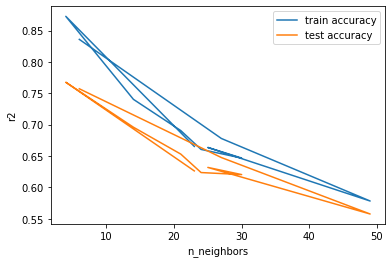

In [69]:
plt.plot(cv_results['param_n_neighbors'], cv_results['mean_train_score'])
plt.plot(cv_results['param_n_neighbors'], cv_results['mean_test_score'])
plt.xlabel('n_neighbors')
plt.ylabel('r2')
plt.legend(['train accuracy', 'test accuracy'], loc='upper right')

# DecisionTree Regressor

In [70]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth=16)
tree.fit(X_train_num_rescaled, y_train)

DecisionTreeRegressor(max_depth=16)

In [71]:
y_train_pred = tree.predict(X_train_num_rescaled)

In [72]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_train, y_train_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_train, y_train_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))

Mean Absolute Error:  0.14795129014589592
Mean Squared Error:  0.3458706123087322
Root Mean Squared Error:  0.5881076536729752


In [73]:
print(metrics.r2_score(y_train, y_train_pred))

0.9987775569739118


In [74]:
y_test_pred = tree.predict(X_test_num_rescaled)

In [75]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  1.1488050538171124
Mean Squared Error:  10.265420542292915
Root Mean Squared Error:  3.20396949771575


In [76]:
print(metrics.r2_score(y_test, y_test_pred))

0.9629673092778132


## Hyper-Parameter Tuning for DT

In [77]:
tuned_parameters = [{'max_depth': [i for i in range(1,21)]}]

clf = RandomizedSearchCV(
    estimator=DecisionTreeRegressor(), 
    param_distributions=tuned_parameters, 
    scoring='r2',
    cv=5,
    return_train_score=True,
    verbose=1
)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8,
                                                       9, 10, 11, 12, 13, 14,
                                                       15, 16, 17, 18, 19,
                                                       20]}],
                   return_train_score=True, scoring='r2', verbose=1)

In [78]:
print("Best parameters set found on train set")
print(clf.best_params_)
print(clf.best_estimator_)
print()

Best parameters set found on train set
{'max_depth': 11}
DecisionTreeRegressor(max_depth=11)



In [79]:
cv_results = pd.DataFrame(clf.cv_results_)

cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003399,0.001364,0.001596,0.000489,3,{'max_depth': 3},0.575691,0.602835,0.635832,0.577710,...,0.607244,0.028519,9,0.648284,0.658464,0.650536,0.648517,0.649433,0.651047,0.003792
1,0.003613,0.000805,0.002164,0.000406,9,{'max_depth': 9},0.839548,0.806968,0.799925,0.787379,...,0.819210,0.027566,6,0.971138,0.976319,0.967155,0.974563,0.969852,0.971805,0.003282
2,0.003391,0.000489,0.001191,0.000403,16,{'max_depth': 16},0.855908,0.807450,0.833865,0.785557,...,0.830429,0.030720,2,0.999783,0.999358,0.998962,0.999744,0.999434,0.999456,0.000298
3,0.003384,0.000817,0.001603,0.000793,11,{'max_depth': 11},0.851923,0.805182,0.825056,0.809340,...,0.834177,0.027925,1,0.991187,0.993512,0.988319,0.994639,0.991145,0.991761,0.002187
4,0.002985,0.000013,0.001403,0.000496,20,{'max_depth': 20},0.849341,0.815295,0.795014,0.808400,...,0.828932,0.029825,3,0.999806,0.999359,0.999328,0.999744,0.999512,0.999550,0.000195


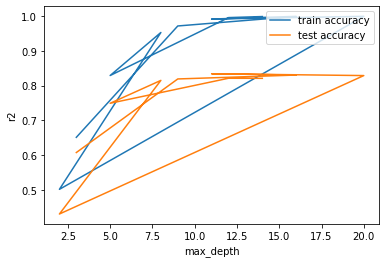

In [80]:
plt.plot(cv_results['param_max_depth'], cv_results['mean_train_score'])
plt.plot(cv_results['param_max_depth'], cv_results['mean_test_score'])
plt.xlabel('max_depth')
plt.ylabel('r2')
plt.legend(['train accuracy', 'test accuracy'], loc='upper right')

# RandomForest Regressor

In [81]:
from sklearn.ensemble import RandomForestRegressor
tree = RandomForestRegressor(max_depth=17)
tree.fit(X_train_num_rescaled, y_train)

RandomForestRegressor(max_depth=17)

In [82]:
y_train_pred = tree.predict(X_train_num_rescaled)

In [83]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_train, y_train_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_train, y_train_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))

Mean Absolute Error:  1.4984588066573867
Mean Squared Error:  4.63398122120538
Root Mean Squared Error:  2.1526683955512933


In [84]:
print(metrics.r2_score(y_train, y_train_pred))

0.983621684452827


In [85]:
y_test_pred = tree.predict(X_test_num_rescaled)

In [86]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  1.972571314809028
Mean Squared Error:  9.577931302457209
Root Mean Squared Error:  3.0948233071465014


In [87]:
print(metrics.r2_score(y_test, y_test_pred))

0.9654474391749542


## Hyper-Parameter Tuning for Random Forest

In [88]:
from sklearn.model_selection import GridSearchCV

n_folds = 5

hyper_parameters = [{'max_depth': range(2, 20, 5)}]

rf = RandomForestRegressor()

# fit tree on training data
tunned_model_rf = GridSearchCV(
                      estimator=rf, 
                      param_grid=hyper_parameters,
                      cv=n_folds, 
                      scoring="r2",
                      return_train_score=True,
                      verbose=1
)

tunned_model_rf.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_depth': range(2, 20, 5)}],
             return_train_score=True, scoring='r2', verbose=1)

In [89]:
print("Best parameters set found on train set")
print(tunned_model_rf.best_params_)
print(tunned_model_rf.best_estimator_)
print()

Best parameters set found on train set
{'max_depth': 12}
RandomForestRegressor(max_depth=12)



In [90]:
cv_results = pd.DataFrame(tunned_model_rf.cv_results_)

cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.130050,0.007667,0.011370,0.002875,2,{'max_depth': 2},0.582121,0.577447,0.622408,0.556815,...,0.579309,0.023830,4,0.638460,0.619496,0.638728,0.598860,0.620509,0.623211,0.014747
1,0.174095,0.012900,0.009173,0.000383,7,{'max_depth': 7},0.882902,0.886302,0.883347,0.856166,...,0.881712,0.014189,3,0.950191,0.949947,0.952836,0.955449,0.949094,0.951504,0.002336
2,0.196269,0.006593,0.009575,0.000489,12,{'max_depth': 12},0.892200,0.904577,0.910442,0.867974,...,0.900554,0.019876,1,0.985676,0.983982,0.984554,0.986103,0.983657,0.984794,0.000949
3,0.195883,0.004484,0.009574,0.000488,17,{'max_depth': 17},0.897216,0.899062,0.902473,0.869720,...,0.899105,0.018219,2,0.986752,0.985519,0.985871,0.985753,0.984582,0.985696,0.000696


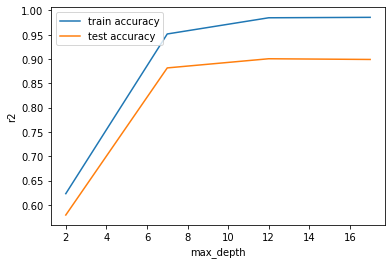

In [91]:
plt.plot(cv_results['param_max_depth'], cv_results['mean_train_score'])
plt.plot(cv_results['param_max_depth'], cv_results['mean_test_score'])
plt.xlabel('max_depth')
plt.ylabel('r2')
plt.legend(['train accuracy', 'test accuracy'], loc='upper left')

# SVM Regressor

In [92]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train_num_rescaled, y_train)

SVR()

In [93]:
y_train_pred = svr.predict(X_train_num_rescaled)

In [94]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_train, y_train_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_train, y_train_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))

Mean Absolute Error:  5.993480664214018
Mean Squared Error:  64.91700028364961
Root Mean Squared Error:  8.057108680143864


In [95]:
print(metrics.r2_score(y_train, y_train_pred))

0.7705577419787284


In [96]:
y_test_pred = svr.predict(X_test_num_rescaled)

In [97]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  5.96745977263907
Mean Squared Error:  65.13610821513407
Root Mean Squared Error:  8.070694407244897


In [98]:
print(metrics.r2_score(y_test, y_test_pred))

0.7650203086722089
